![](https://healthitanalytics.com/images/site/article_headers/_normal/ThinkstockPhotos-495951912.jpg)
# Introduction 

## Importance of this dataset
Breast cancer is one of the most prevalent cancer present in females. Although numerous imaging techniques have been put in place for the diagnostic and treatment of breast cancer, the advancement in genetic programming and machine learning over the past decades have improved the accuracy of breast cancer detection tremendously, more so than imaging techniques. To facilitate interpretation and analysis, enormous amount of mammography films have been processed by the system to help improve the visibility of peripheral areas and intensity distribution, and several methods have been reported to assist in this process. Feature extraction is one of the most important step in breast cancer detection due to its ability to differentiate between benign and malignant tumors. After extraction, image properties such as smoothness, coarseness, depth, and regularity are extracted by segmentation.

This dataset is ideal for the testing of machine learning model but since I have just started out (this is my second Kaggle), I will be merely performing an exploration data analysis. 

## Objective
- Find out the correlation between cancer radius, texture,parimeter, compactness, etc and whether the cancer is malignant or benign. 
- Upon finding out their correlation, find the relationship between these variables and whether the cancer is malignant or benign.


First step is to import the required packages. Mainly Numpy, Pandas, Matplotlib and Seaborn. 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  

Using pandas, we will import the dataset into our notebook.

In [2]:
bc_dataset = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

We will then have a quick view of the dataset. 

In [3]:
bc_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
bc_dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


For each column, what we can understand is:
- Diagnostic is represented by M(malignant-bad) and B(Benign).
- Types of data include 
    * Radius, measured from center to point of parimeter (mean, standard error, worst[highest mean])
    * Texture, measured by pixels making up the segmented area, is represented by grey-scale values (0 for black and 255 for white).
    * Perimeter, which is the size of the core tumour 
    * Area, area of the tumour 
    * Smoothness, measured by variation in radius length
    * Compactness, measured by the mean of [(square of parimeter)/area -1]
    * Concavity, whether it concave upwards or concave downwards 
    * Concave point (number of concave portions)
    * Symmetry 
    * Fractal dimension, which measures the complexity comparing how a detail in a pattern changes with the scale in which it is measured.
    
### Alright, now let's see if there are any NULL, NaN or unknown values!

In [5]:
bc_dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Great to see no null values here! Alright! Now, let's separate the data according to mean, standard error and worst.

In [6]:
# Separating the mean and looking into the data
list_mean=['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean',
      'smoothness_mean','compactness_mean','concavity_mean',
      'concave points_mean','symmetry_mean','fractal_dimension_mean']
mean_data=bc_dataset[list_mean]
mean_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Here, we will use the PairPlot tool from Seaborn to see the distribution and relationships among variables.

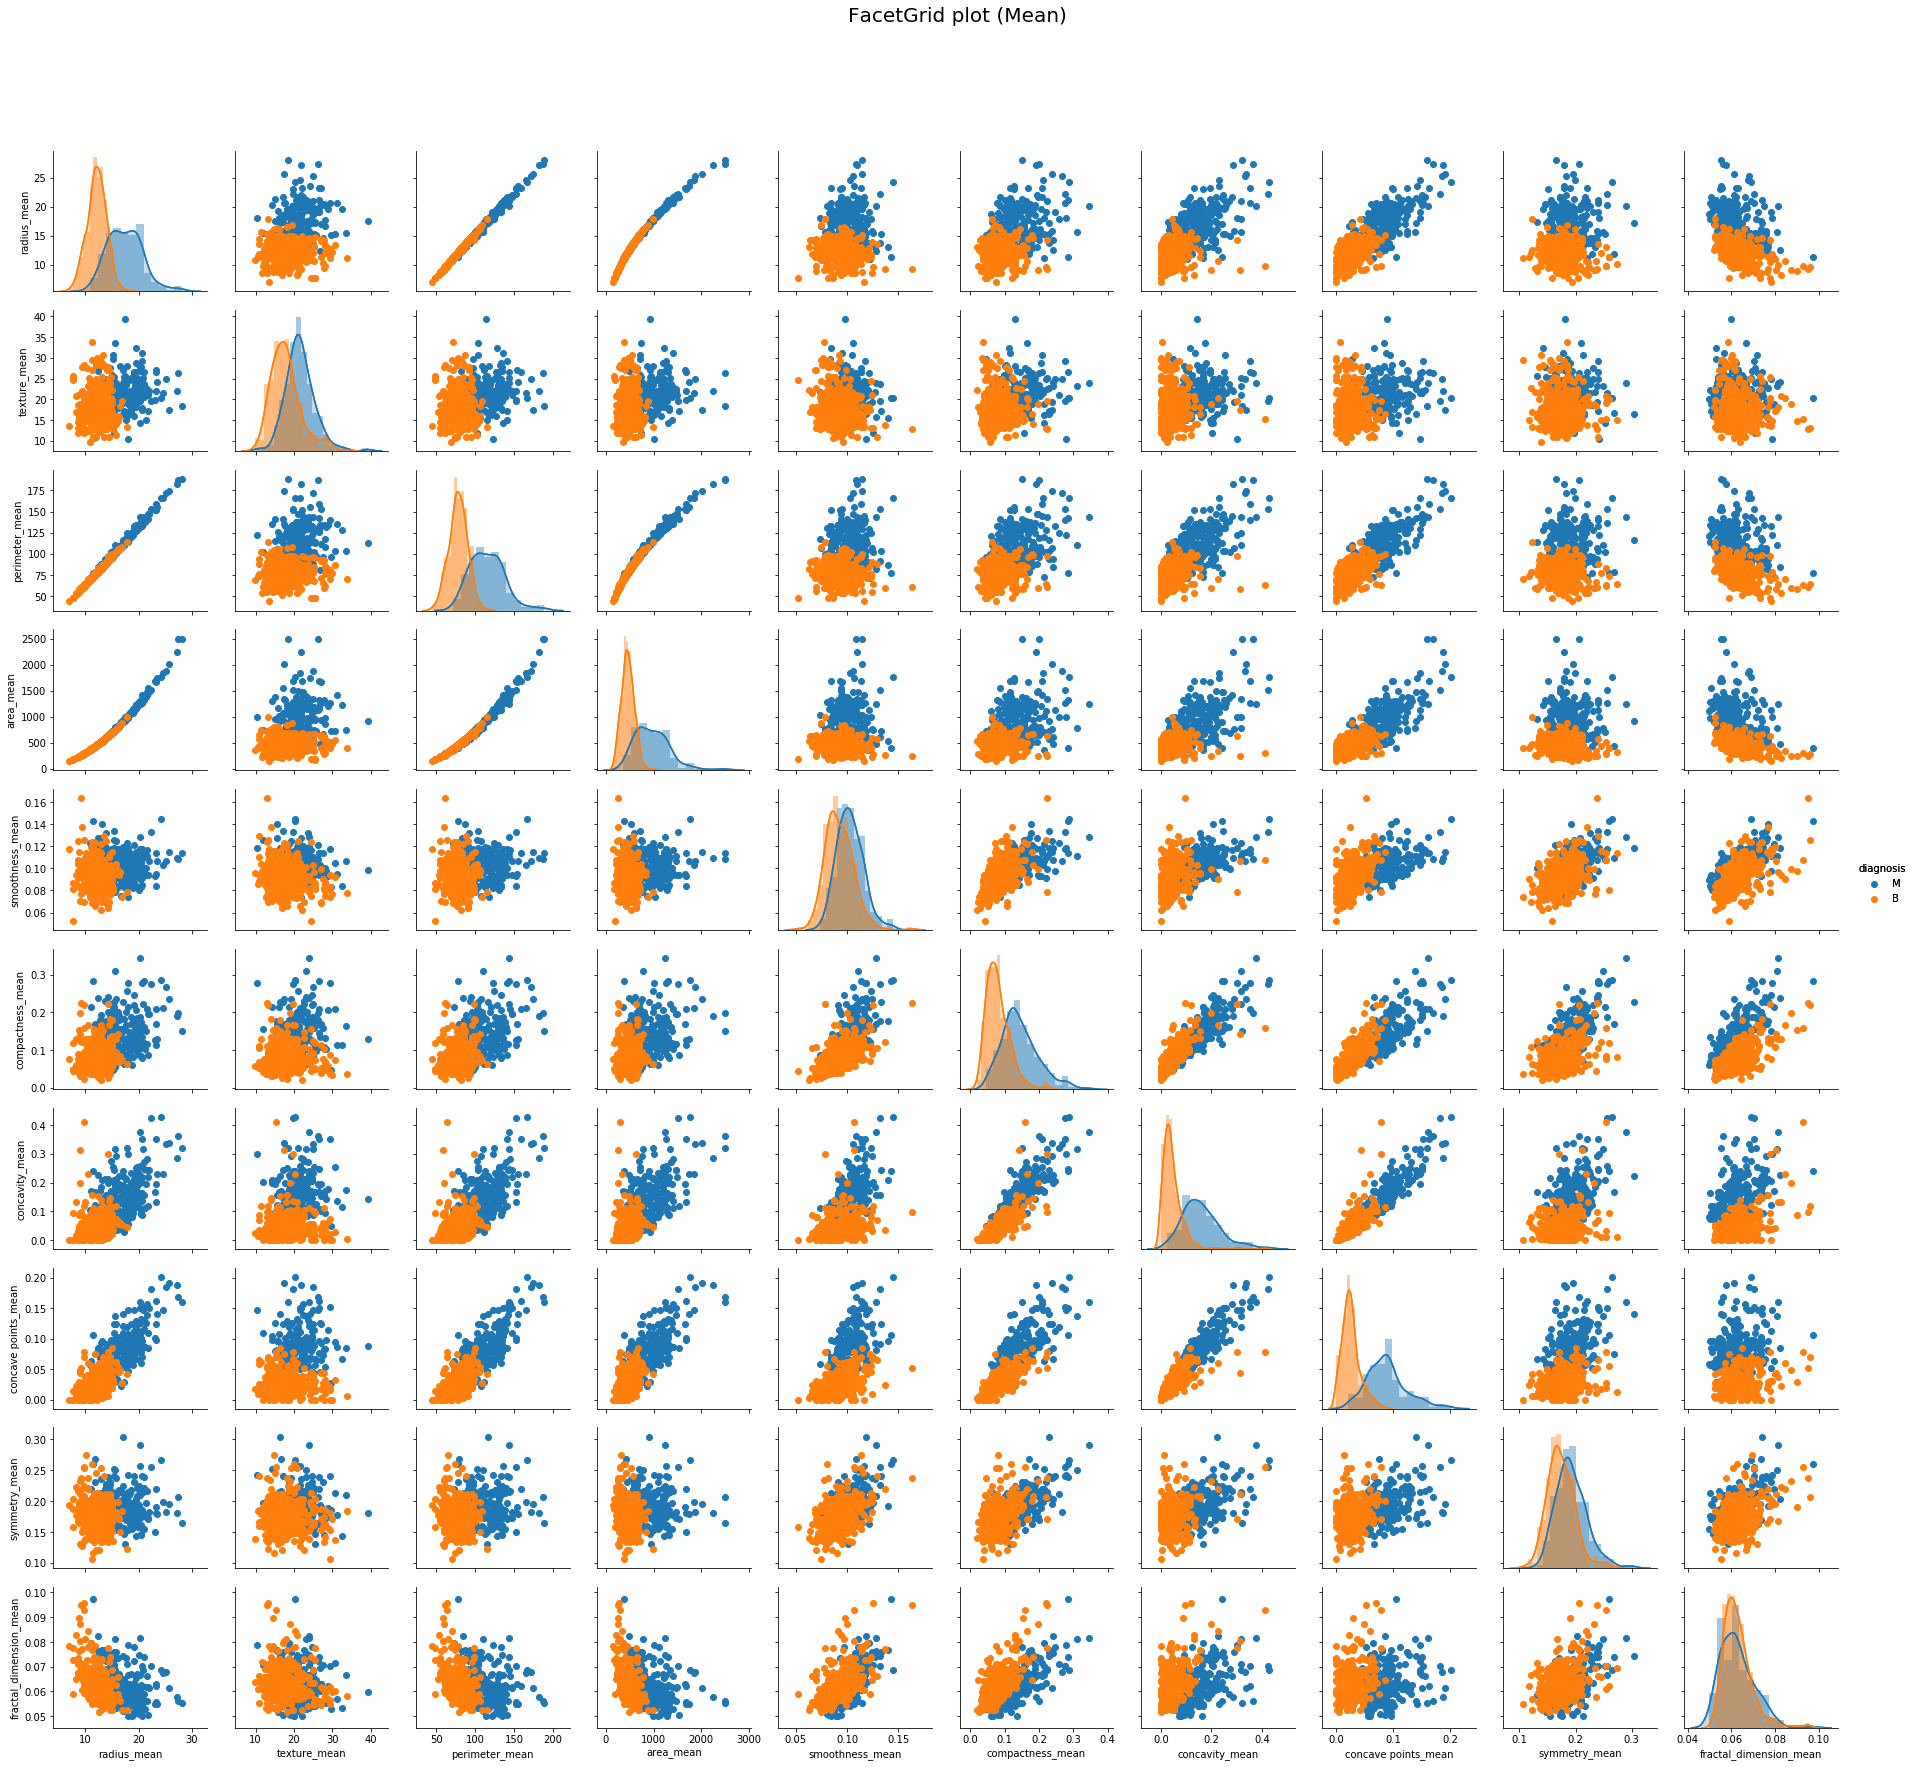

In [7]:
# Implementing pairplot 
g = sns.pairplot(mean_data, hue = 'diagnosis')
g.map_diag(sns.distplot)
g.map_offdiag(plt.scatter)
g.add_legend()
g.fig.suptitle('FacetGrid plot (Mean)', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

## What do we see here?
- Well, we can clearly see that malignant tumour seem to have longer range among all variables, except for fractal dimension.
- Also, the peak for malignant tumour seems to appear more on the right as compared to benign tumours. 
    * This means that malignant tumour tend to have larger radius, rougher texture, more compactness,concavity and concave points. 
    
### *We will be using this dataset for majority of our analysis.*

Here, we will do the same for the data comprising the standard of error

In [8]:
# Separating the mean and looking into the data
list_se=['diagnosis','radius_se','texture_se','perimeter_se','area_se',
      'smoothness_se','compactness_se','concavity_se',
      'concave points_se','symmetry_se','fractal_dimension_se']
se_data=bc_dataset[list_se]
se_data.head()

,diagnosis,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,M,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,M,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,M,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,M,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,M,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


KeyboardInterrupt: 

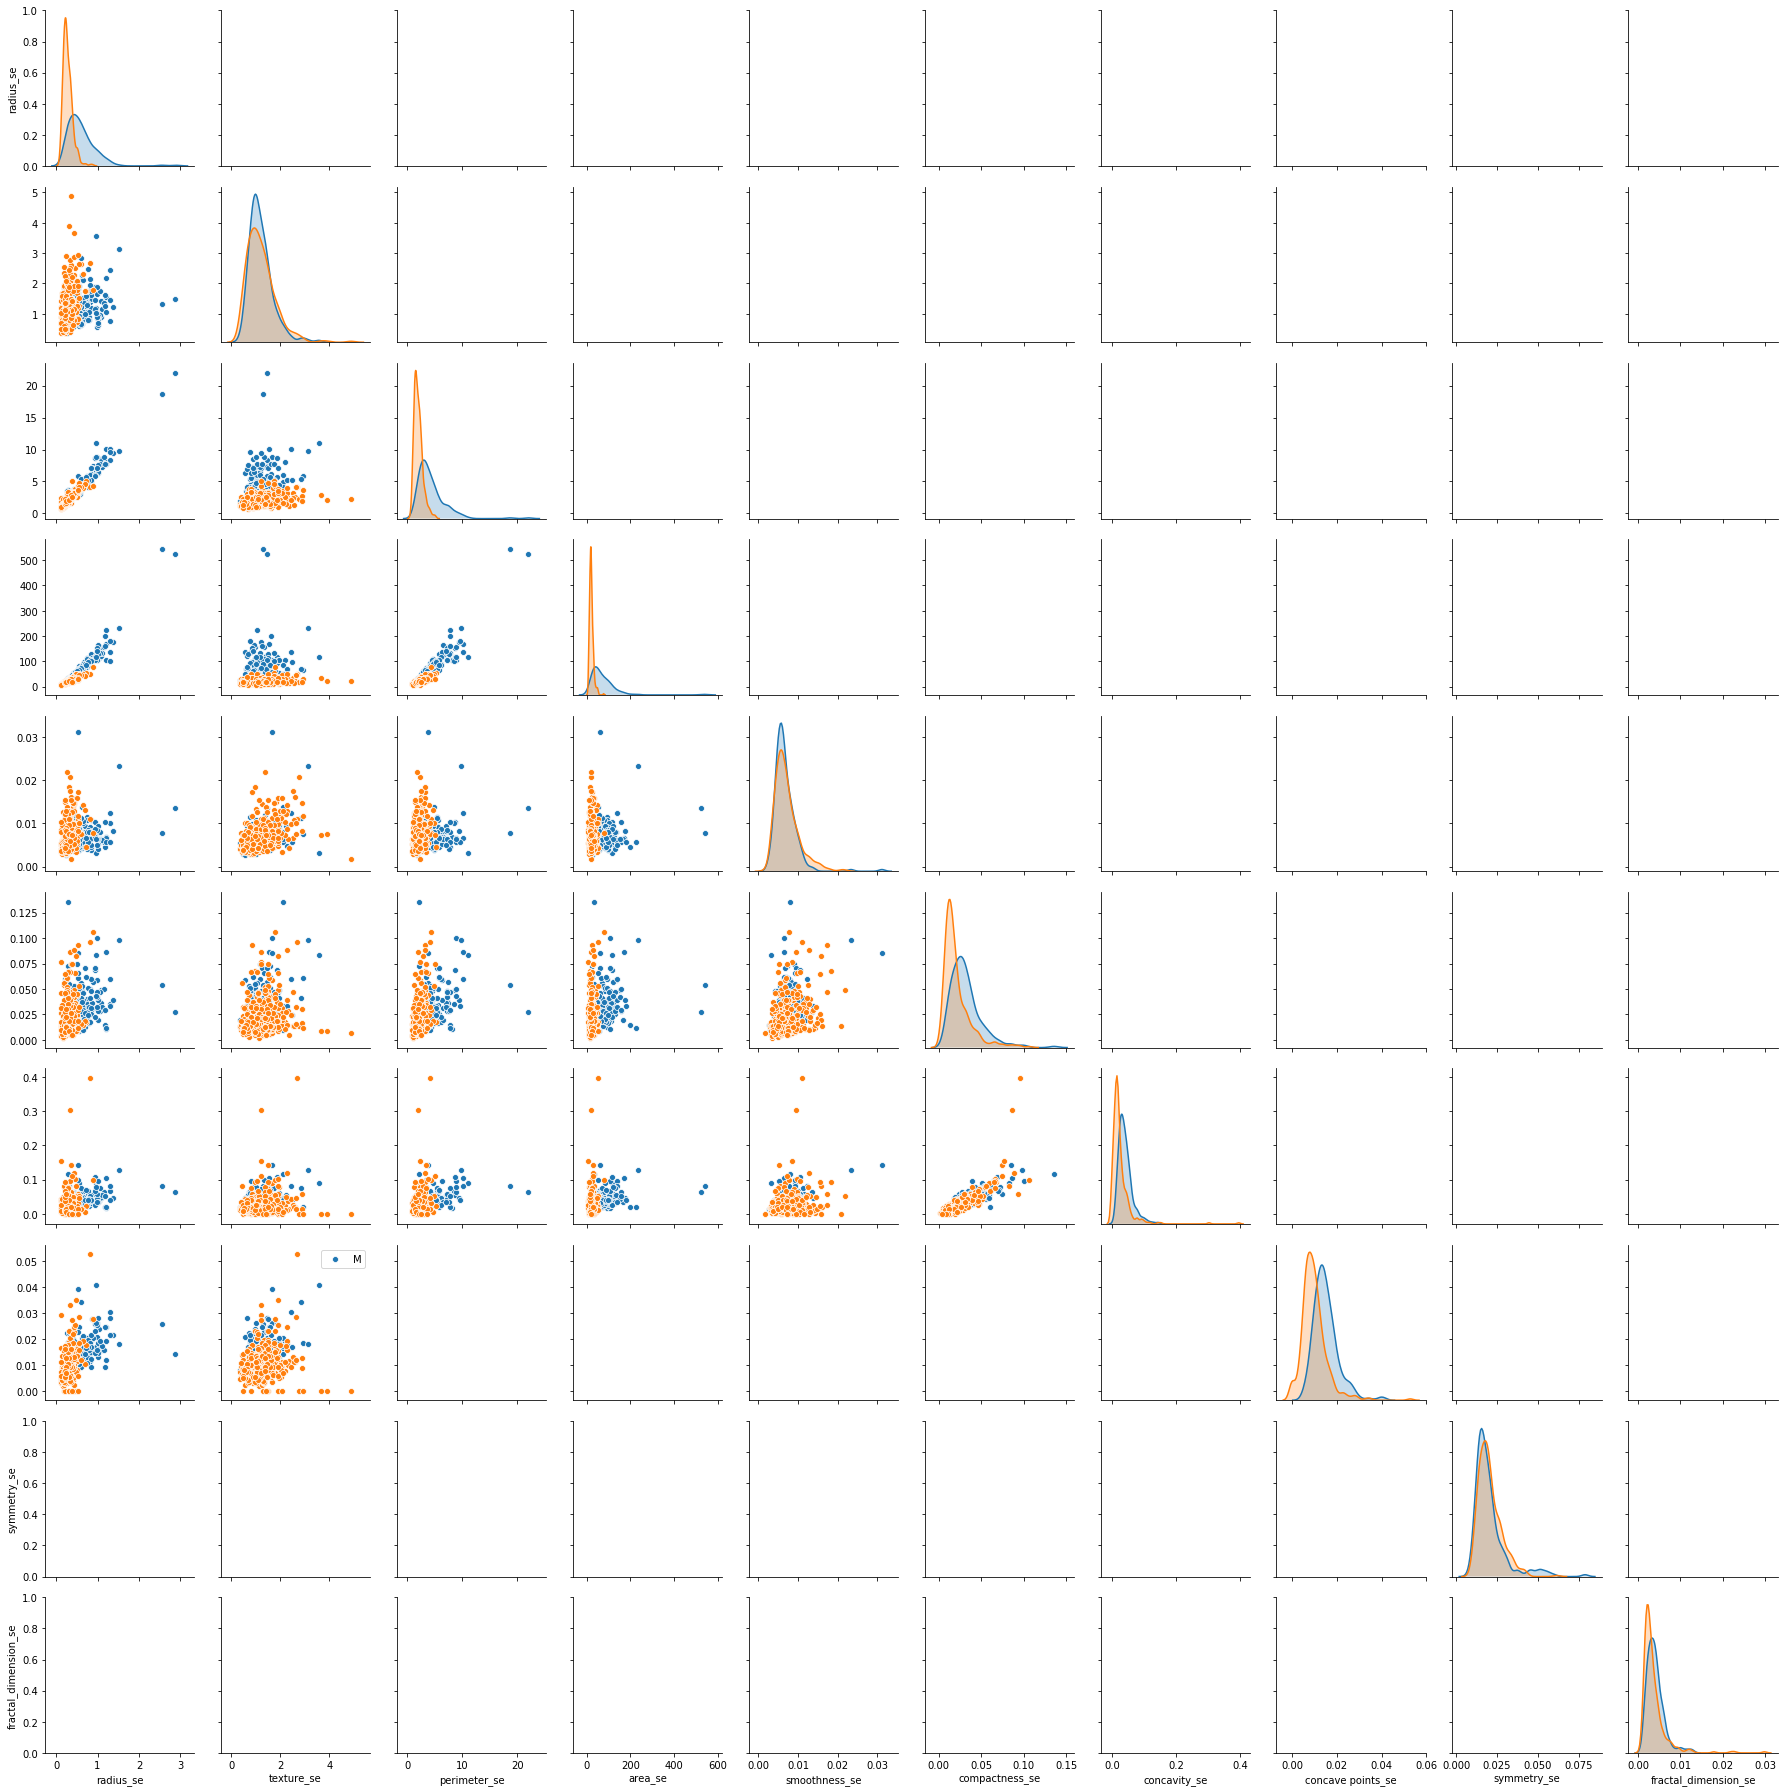

In [9]:
# Implementing pairplot 
gg = sns.pairplot(se_data, hue = 'diagnosis')
gg.map_diag(sns.distplot)
gg.map_offdiag(plt.scatter)
gg.add_legend()
gg.fig.suptitle('FacetGrid plot (Standard of error)', fontsize = 20)
gg.fig.subplots_adjust(top= 0.9);

## What do we see here?
- Ideally, we are expecting similar standard of error when comparing datasets with malignant and benign tumours. 
    * Yes, we do see both datasets having relatively similar values/ratios.
    

# Correlation
- Here, we will want to find out the correlations among each variable.
    * To do so we will need to plot a correlation matrix
    * This method is normally used for feature selection. Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. When two features have high correlation, one is dropped. 
        * This step is essential in reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.




In [ ]:
ax = sns.heatmap(mean_data.corr())

## Let's find the correlation between each variable and whether the tumour is malignant or benign based on that!

1. Correlation between mean of radius and malignant tumour

In [ ]:
radius_diagnosis = ['diagnosis','radius_mean']
radius_corr =bc_dataset[radius_diagnosis]
radius_corr.radius_mean = radius_corr.radius_mean.round()
radius_m_corr = radius_corr[radius_corr['diagnosis'] == 'M'].groupby(['radius_mean']).size().reset_index(name = 'count')
radius_m_corr.corr()

- Plotting the regression plot

In [ ]:
sns.regplot(x = 'radius_mean', y = 'count', data = radius_m_corr).set_title("Mean radius vs Malignant count")

## Observation
- For correlation coefficient, a positive 1 means a perfect positive correlation, which means both variables move in the same direction. If one goes up, the other will go up. In contrary, a negative 1 means the relationship that exists between two variables is negative 100% of the time.
    * We do observe a relatively strong negative correlation between mean radius and malignant tumour counts. From the diagram, we do see huge counts from radius ranging between 15 to 20. Although we observed a negative correlation, we need to pay attention to the peak of the diagram. This diagram has a greater range for radius than the diagram showing benign tumour. 

2. Correlation between mean of radius and benign tumour

In [ ]:
radius_b_corr = radius_corr[radius_corr['diagnosis'] == 'B'].groupby(['radius_mean']).size().reset_index(name = 'count')
radius_b_corr.corr()

In [ ]:
sns.regplot(x = 'radius_mean', y = 'count', data = radius_b_corr).set_title("Mean radius vs Benign count")

## Observation
- Significantly low correlation between radius and benign count.
- A narrower range for radius as compared to the diagram showing malignant tumour.

3. Correlation between mean of texture and malignant tumour counts 

In [ ]:
texture_diagnosis = ['diagnosis','texture_mean']
texture_corr =bc_dataset[texture_diagnosis]
texture_corr.texture_mean = texture_corr.texture_mean.round()
texture_m_corr = texture_corr[radius_corr['diagnosis'] == 'M'].groupby(['texture_mean']).size().reset_index(name = 'count')
texture_m_corr.corr()

In [ ]:
sns.regplot(x = 'texture_mean', y = 'count', data = texture_m_corr).set_title("Mean texture vs Malignant count")

## Observation
- We seem to see observation similar to mean radius. We clearly do not see a linear relationship in malignant count and mean texture. We see the peak in between 20-25.  

4. Correlation between texture and belign tumour 

In [ ]:
texture_b_corr = texture_corr[texture_corr['diagnosis'] == 'B'].groupby(['texture_mean']).size().reset_index(name = 'count')
texture_b_corr.corr()

In [ ]:
sns.regplot(x = 'texture_mean', y = 'count', data = texture_b_corr).set_title("Mean texture vs Benign count")

## Observation
- We do see a narrower range of 15-20 as compared to 20-25 in the previous diagram. Similar pattern as mean radius. 

5. Correlation between parimeter and malignant tumour count

In [ ]:
perimeter_diagnosis = ['diagnosis','perimeter_mean']
perimeter_corr =bc_dataset[perimeter_diagnosis]
perimeter_corr.perimeter_mean = perimeter_corr.perimeter_mean.round()
perimeter_m_corr = perimeter_corr[perimeter_corr['diagnosis'] == 'M'].groupby(['perimeter_mean']).size().reset_index(name = 'count')
perimeter_m_corr.corr()

In [ ]:
sns.regplot(x = 'perimeter_mean', y = 'count', data = perimeter_m_corr).set_title("Mean perimeter vs Malignant count")

In [ ]:
perimeter_b_corr = perimeter_corr[perimeter_corr['diagnosis'] == 'B'].groupby(['perimeter_mean']).size().reset_index(name = 'count')
perimeter_b_corr.corr()

In [ ]:
sns.regplot(x = 'perimeter_mean', y = 'count', data = perimeter_b_corr).set_title("Mean perimeter vs Benign count")

## Observation
- As usual, we see the peak ranging around 100-140 for malignant tumours and 70-90 for benign tumours. 

## So why do we see similar patterns in mean area, mean texture and mean perimeter?
- Well, if you look in the heatmap you will see two main clusters that are highly correlated. The first cluster involves area, texture, perimeter and radius, hence, we see that similar pattern.

### Let's look into the second cluster comprising of compactness, concavity and concave points.

In [ ]:
compactness_diagnosis = ['diagnosis','compactness_mean']
compactness_corr =bc_dataset[compactness_diagnosis]
compactness_corr.compactness_mean = compactness_corr.compactness_mean.round(2) # Round off to 2 decimal places
compactness_m_corr = compactness_corr[compactness_corr['diagnosis'] == 'M'].groupby(['compactness_mean']).size().reset_index(name = 'count')
compactness_m_corr.corr()

In [ ]:
sns.regplot(x = 'compactness_mean', y = 'count', data = compactness_m_corr).set_title("Mean compactness vs Malignant count")

In [ ]:
compactness_b_corr = compactness_corr[compactness_corr['diagnosis'] == 'B'].groupby(['compactness_mean']).size().reset_index(name = 'count')
compactness_b_corr.corr()

In [ ]:
sns.regplot(x = 'compactness_mean', y = 'count', data = compactness_b_corr).set_title("Mean compactness vs Benign count")

In [ ]:
concavity_diagnosis = ['diagnosis','concavity_mean']
concavity_corr =bc_dataset[concavity_diagnosis]
concavity_corr.concavity_mean = concavity_corr.concavity_mean.round(2) # Round off to 2 decimal places
concavity_m_corr = concavity_corr[concavity_corr['diagnosis'] == 'M'].groupby(['concavity_mean']).size().reset_index(name = 'count')
concavity_m_corr.corr()

In [ ]:
sns.regplot(x = 'concavity_mean', y = 'count', data = concavity_m_corr).set_title("Mean compactness vs Malignant count")

In [ ]:
concavity_b_corr = concavity_corr[concavity_corr['diagnosis'] == 'B'].groupby(['concavity_mean']).size().reset_index(name = 'count')
concavity_b_corr.corr()

In [ ]:
sns.regplot(x = 'concavity_mean', y = 'count', data = concavity_b_corr).set_title("Mean compactness vs Benign count")

### We did see exact pattern as the first cluster.

# Summary
- Although we do not see concrete correlation between the variables and the type of tumour counts, we are able to see similar patterns between the clusters that are highly correlated on the correlation matrix. 
- What we see is malignant tumours tend to have higher radius, texture, area, perimeter, concavity, compactness and concave points. 